<a href="https://colab.research.google.com/github/melinaminaya/first_ml_project/blob/main/Neural%20Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Code


In [25]:
import matplotlib

In [26]:
from sklearn.datasets import make_regression

#gera 200 amostras
x, y = make_regression(n_samples=200, n_features=1, noise=30)

In [27]:
import matplotlib.pyplot as plt


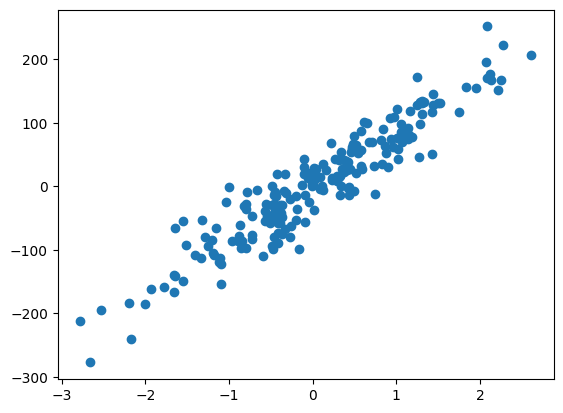

In [28]:
plt.scatter(x,y)
plt.show()

# New Neural Problem


Neural Network from scrap.

In [29]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

Mnist database.
### Defining an image conversion to tensor.

In [30]:
transform = transforms.ToTensor()

Load dataset training

In [31]:
trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform= transform)

Create buffer to get parts of data

In [32]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Load validation

In [33]:
valset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=transform)

Create buffer to load data

In [34]:
valloader=torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

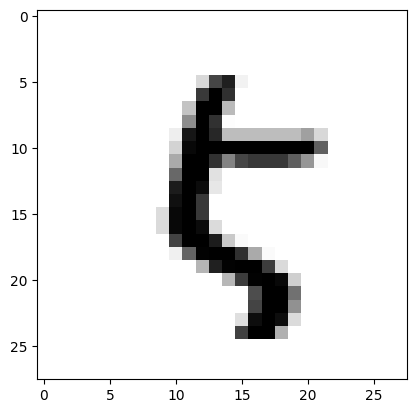

In [35]:
dataiter = iter(trainloader)
imagens, etiquetas = next(dataiter)
plt.imshow(imagens[0].numpy().squeeze(), cmap='gray_r')

Verify size of image tensor

In [36]:
print(imagens[0].shape)
print(etiquetas[0].shape)

torch.Size([1, 28, 28])
torch.Size([])


Check Keras Inception v3 = neural network
[Keras Models](https://keras.io/api/applications)

Structure of inception network:

In [37]:
class Modelo(nn.Module):
  def __init__(self):
    super(Modelo, self).__init__()
    self.linear1 = nn.Linear(28*28, 128) #entrance layer, 784 neurons that link to 128
    self.linear2 = nn.Linear(128,64) #internal layer 1, 128 neurons that link to 64
    self.linear3 = nn.Linear(64,10) #internal layer 2, 64 neurons that link to 10
    #for exit layer there is no need to define anything, we just need to take the output of internal layer 2.

  def forward(self, X):
    X = F.relu(self.linear1(X)) #activation function of entry layer to internal layer 1
    X = F.relu(self.linear2(X)) #activation function of internal layer 1 to layer 2
    X = self.linear3(X) #activation function of internal layer 2 to exit layer in this case f(x) = x
    return F.log_softmax(X, dim=1) #used data to calculate loss


If you increase neurons number, heavier the network will be. It depends on how faster you need it to be. Decrease performance.

In [38]:
def treino(modelo, trainloader, device):
  otimizador = optim.SGD(modelo.parameters(), lr=0.01, momentum = 0.5) #define update policy of weigths and bias
  inicio = time() #timer to know how long it took

  criterio = nn.NLLLoss() #define criteria to calculate loss
  EPOCHS = 10 #epochs number that the algo will run
  modelo.train() # activating training

  for epoch in range(EPOCHS):
    perda_acumulada = 0 #init cumulative loss in each epoch

    for imagens, etiquetas in trainloader:
      imagens = imagens.view(imagens.shape[0], -1) #convert images to vectors 28*28 slots
      otimizador.zero_grad() # lead gradients to zero because of last cicle

      output = modelo(imagens.to(device)) # put data in model
      perda_instantanea = criterio(output, etiquetas.to(device)) #calculate epoch loss

      perda_instantanea.backward() #back propagation from the loss

      otimizador.step() #update weigths and bias

      perda_acumulada += perda_instantanea.item() #update accumulated loss

    else:
      print("Epoch {} - Perda resultante: {}".format(epoch+1, perda_acumulada/len(trainloader)))

  print("\nTempo de treino (em minutos) =", (time()-inicio)/60)

Model Validation that shows accuracy

In [39]:
def validacao(modelo, valloader, device):
  conta_corretas, conta_todas = 0,0
  for imagens, etiquetas in valloader:
    for i in range(len(etiquetas)):
      img = imagens[i].view(1,784)
      #deactivate autograd to speed up validation. Dynamical computational graphs have high processing costs.
      with torch.no_grad():
        logps = modelo(img.to(device)) #model output in logarithm scale

      ps = torch.exp(logps) #convert output to normal scale (remember that it is a tensor)
      probab = list(ps.cpu().numpy()[0])
      etiqueta_pred = probab.index(max(probab)) # convert tensor to a number, in this case, a number that the model foreseen(previewed)
      etiqueta_certa = etiquetas.numpy()[i]
      if(etiqueta_certa == etiqueta_pred): # compare foreseen value
        conta_corretas += 1
        conta_todas += 1

  print("Total de imagens testadas =", conta_todas)
  print("\nPrecisão do modelo = {}%".format(conta_corretas*100/conta_todas))

Init Model

In [40]:
modelo = Modelo()
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
modelo.to(device)

Modelo(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)